# Import Libraries

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Datasets

In [51]:
df = pd.read_csv('german_credit_data.csv')
df.head(3)

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education


# Drop Unused Column

In [52]:
df=df.drop(['Unnamed: 0'],axis=1)
df.head(3)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education


# Quick-look (dimension, data type, summary statistics, columns)

In [53]:
df.shape

(1000, 9)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
Age                 1000 non-null int64
Sex                 1000 non-null object
Job                 1000 non-null int64
Housing             1000 non-null object
Saving accounts     817 non-null object
Checking account    606 non-null object
Credit amount       1000 non-null int64
Duration            1000 non-null int64
Purpose             1000 non-null object
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


In [55]:
df.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


In [56]:
list(df.columns)

['Age',
 'Sex',
 'Job',
 'Housing',
 'Saving accounts',
 'Checking account',
 'Credit amount',
 'Duration',
 'Purpose']

# Split Categorical & Numerical

In [57]:
kategorik=['Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']
categorical=df[kategorik]
categorical.head(3)

,Sex,Job,Housing,Saving accounts,Checking account,Purpose
0,male,2,own,NaN,little,radio/TV
1,female,2,own,little,moderate,radio/TV
2,male,1,own,little,NaN,education


In [58]:
numerical=df.drop(kategorik,axis=1)
numerical.head(3)

,Age,Credit amount,Duration
0,67,1169,6
1,22,5951,48
2,49,2096,12


# Identify & Handle missing value

In [59]:
count_missing = df.isnull().sum().sort_values(ascending = False)
count_missing

Checking account    394
Saving accounts     183
Purpose               0
Duration              0
Credit amount         0
Housing               0
Job                   0
Sex                   0
Age                   0
dtype: int64

In [60]:
df['Checking account'] = df['Checking account'].fillna(df['Checking account'].mode().values[0])
df['Saving accounts'] = df['Saving accounts'].fillna(df['Saving accounts'].mode().values[0])

In [61]:
count_missing2 = df.isnull().sum().sort_values(ascending = False)
count_missing2

Purpose             0
Duration            0
Credit amount       0
Checking account    0
Saving accounts     0
Housing             0
Job                 0
Sex                 0
Age                 0
dtype: int64

# Numerical Graph

Text(0.5,1,'Distribution CREDIT AMOUNT')

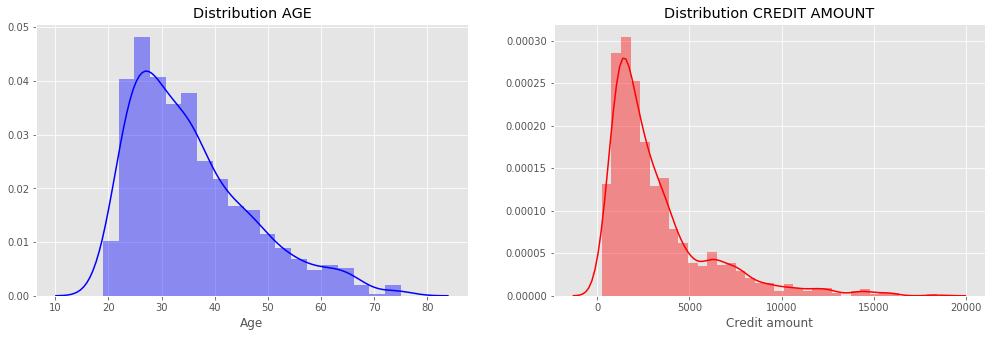

In [82]:
plt.style.use('ggplot')
f=plt.figure(figsize=(17,5))
f.add_subplot(1,2,1)
sns.distplot(numerical['Age'], color='blue').set_title('Distribution AGE')
f.add_subplot(1,2,2)
sns.distplot(numerical['Credit amount'], color='red').set_title('Distribution CREDIT AMOUNT')

Text(0.5,1,'Distribution DURATION')

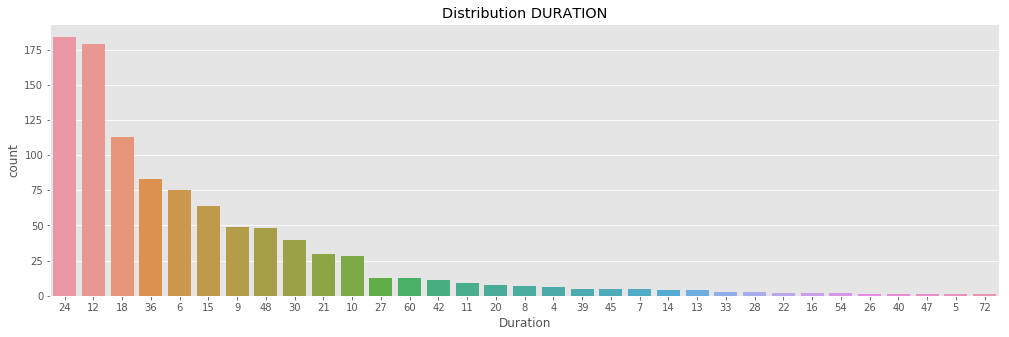

In [83]:
plt.style.use('ggplot')
plt.figure(figsize=(17,5))
sns.countplot(numerical['Duration'], order=numerical['Duration'].value_counts().index).set_title('Distribution DURATION')

# Corelation with Heatmap

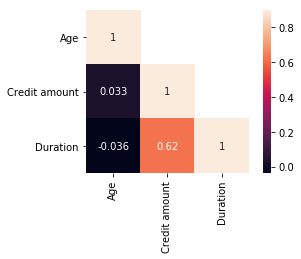

In [68]:
#create correlation
corr = numerical.corr(method = 'pearson')

#convert correlation to numpy array
mask = np.array(corr)

#to mask the repetitive value for each pair
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots(figsize = (15,12))
fig.set_size_inches(5,3)
sns.heatmap(corr, 
            mask = mask, 
            vmax = 0.9, 
            square = True, 
            annot = True)

# Categorical Graphs

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

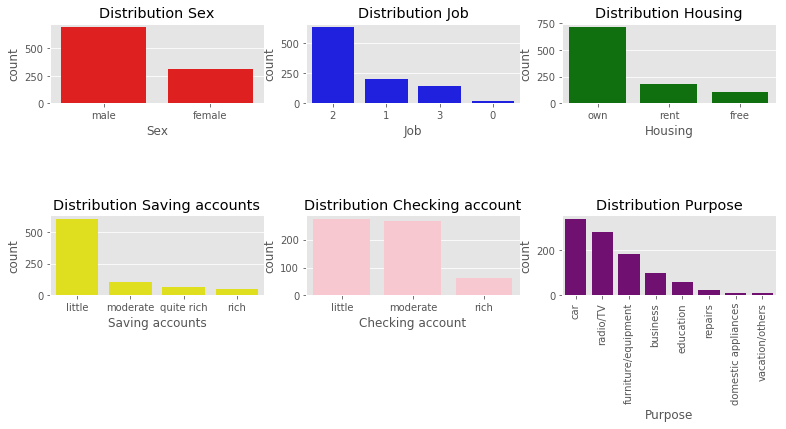

In [91]:
plt.style.use('ggplot')
f=plt.figure(figsize=(13,5))
f.add_subplot(3,3,1)  
sns.countplot(categorical['Sex'], color='red', order=categorical['Sex'].value_counts().index).set_title('Distribution Sex')
f.add_subplot(3,3,2)
sns.countplot(categorical['Job'], color='blue', order=categorical['Job'].value_counts().index).set_title('Distribution Job')
f.add_subplot(3,3,3)
sns.countplot(categorical['Housing'], color='green', order=categorical['Housing'].value_counts().index).set_title('Distribution Housing')
f.add_subplot(3,3,7)
sns.countplot(categorical['Saving accounts'], color='yellow', order=categorical['Saving accounts'].value_counts().index).set_title('Distribution Saving accounts')
f.add_subplot(3,3,8)
sns.countplot(categorical['Checking account'], color='pink', order=categorical['Checking account'].value_counts().index).set_title('Distribution Checking account')
f.add_subplot(3,3,9)
sns.countplot(categorical['Purpose'], color='purple', order=categorical['Purpose'].value_counts().index).set_title('Distribution Purpose')
plt.xticks(rotation=90)

# Label VS Categorical feature

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

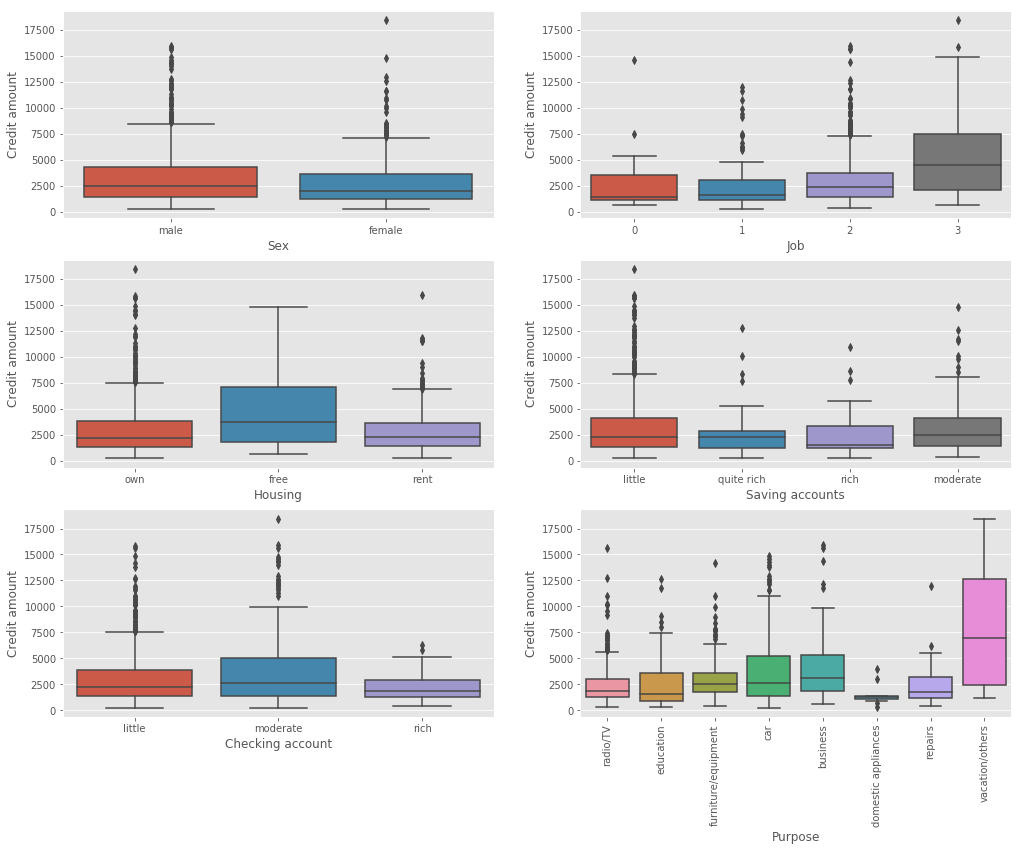

In [104]:
f=plt.figure(figsize=(17,13))
f.add_subplot(3,2,1)
g = sns.boxplot(y=df["Credit amount"], x=df['Sex'])
f.add_subplot(3,2,2)
g = sns.boxplot(y=df["Credit amount"], x=df['Job'])
f.add_subplot(3,2,3)
g = sns.boxplot(y=df["Credit amount"], x=df['Housing'])
f.add_subplot(3,2,4)
g = sns.boxplot(y=df["Credit amount"], x=df['Saving accounts'])
f.add_subplot(3,2,5)
g = sns.boxplot(y=df["Credit amount"], x=df['Checking account'])
f.add_subplot(3,2,6)
g = sns.boxplot(y=df["Credit amount"], x=df['Purpose'])
plt.xticks(rotation=90)

# Label VS Numerical feature

Text(0.5,1,'SCATTERPLOT Duration VS Credit amount')

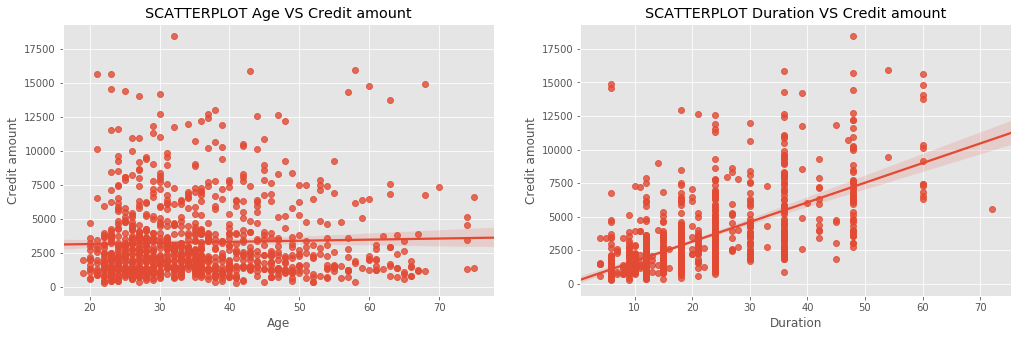

In [107]:
plt.style.use('ggplot')
f=plt.figure(figsize=(17,5))
f.add_subplot(1,2,1)
sns.regplot(df['Age'],df['Credit amount'],fit_reg=True).set_title('SCATTERPLOT Age VS Credit amount')
f.add_subplot(1,2,2)
sns.regplot(df['Duration'],df['Credit amount'],fit_reg=True).set_title('SCATTERPLOT Duration VS Credit amount')

